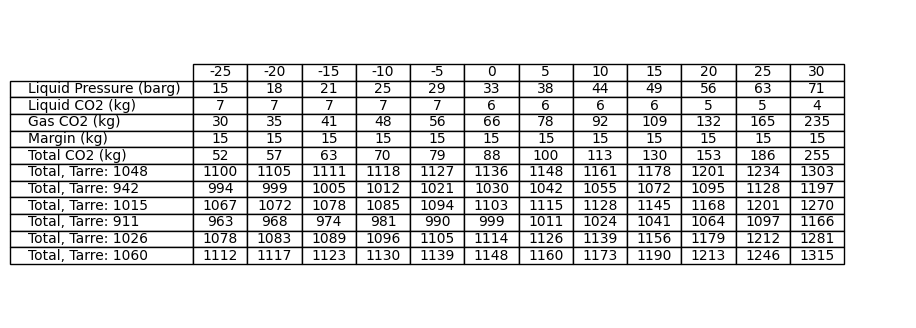

Temperature (°C)         -25   -20   -15   -10   -5     0     5     10    15  \
Liquid Pressure (barg)    15    18    21    25    29    33    38    44    49   
Liquid CO2 (kg)            7     7     7     7     7     6     6     6     6   
Gas CO2 (kg)              30    35    41    48    56    66    78    92   109   
Margin (kg)               15    15    15    15    15    15    15    15    15   
Total CO2 (kg)            52    57    63    70    79    88   100   113   130   
Total, Tarre: 1048      1100  1105  1111  1118  1127  1136  1148  1161  1178   
Total, Tarre: 942        994   999  1005  1012  1021  1030  1042  1055  1072   
Total, Tarre: 1015      1067  1072  1078  1085  1094  1103  1115  1128  1145   
Total, Tarre: 911        963   968   974   981   990   999  1011  1024  1041   
Total, Tarre: 1026      1078  1083  1089  1096  1105  1114  1126  1139  1156   
Total, Tarre: 1060      1112  1117  1123  1130  1139  1148  1160  1173  1190   

Temperature (°C)          20    25    3

'\n\n\nvalidation: 11-feb-25, 12:00\nwe saw a sudden drop in flow at about 6min before we stopped. At that time the flow was average 32kg/h, os that is 3.2kg. The end-weight of the rack 1146 + 3kg = 1149, so when the temperature of the hall was 12degrees that would be spot on.\nIf we add an 15kg margin on the table, we should be ok.\n'

In [3]:

#@title Generate Table of weight in racks vs temp
import numpy as np
import matplotlib.pyplot as plt
from CoolProp.CoolProp import PropsSI
#from tabulate import tabulate  # Import tabulate
import CoolProp.CoolProp as CP
import math
#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd


# %%

# Constants
pipe_height = 15e-3  # 15 mm in meters
bottle_circumference = 0.725 - 2 * 3e-3   #72.5cm in m, outer circumference, assuming 3mm thickness, so worst case for liquid mass
margin_mass = 15 #kg of margin
bottle_diameter = bottle_circumference/np.pi  # from circumference
bottle_radius = bottle_diameter / 2
bottle_area = np.pi * (bottle_radius ** 2)  # Cross-sectional area

num_bottles = 12  # Total number of bottles in the rack
rack_volume_prescribed = 0.6  # Total bottle volume in m^3 (600 liters, according to tarre plate)
bottle_height_from_volume = rack_volume_prescribed / num_bottles / bottle_area # check height: in field: 139cm round bottom till round top, 150 full height, 144cm nett height?
bottle_height_measured = 1.40 # assumed nett internal height
rack_volume_from_bottle_height = bottle_height_measured * bottle_area * num_bottles #-> 10% more voluem in bottles?

rack_volume = rack_volume_from_bottle_height

liquid_volume = bottle_area * pipe_height * num_bottles  # Liquid volume in m^3
gas_volume = rack_volume - liquid_volume  # Gas volume in m^3
rack_weights = [1048, 942, 1015, 911, 1026, 1060] # Array of rack weights

# Generate table data
temps = np.arange(-25, 31, 5)  # 0 to 30°C in 5-degree increments
co2_data = []

for temp in temps:
    temp_k = temp + 273.15  # Convert to Kelvin

    pressure = PropsSI('P', 'T', temp_k, 'Q', 1, 'CO2') / 1e5 -1 # Convert Pa to barg
    liquid_density = PropsSI('D', 'T', temp_k, 'Q', 0, 'CO2')
    gas_density = PropsSI('D', 'T', temp_k, 'Q', 1, 'CO2')

    liquid_mass = liquid_volume * liquid_density  # Mass of liquid CO2 in kg
    gas_mass = gas_volume * gas_density  # Mass of gas CO2 in kg

    total_mass = liquid_mass + gas_mass + margin_mass # Total CO2 mass in kg


    # Calculate total weight for each rack and append to row data
    row_data = [temp, pressure, liquid_mass, gas_mass, margin_mass, total_mass]
    for rack_weight in rack_weights:
        total_weight = total_mass + rack_weight
        row_data.append(total_weight)  # Add total weight to row

    co2_data.append(row_data)  # Append row data to main data list

# Create DataFrame with dynamic column names
columns = [
    "Temperature (°C)", "Liquid Pressure (barg)",
    "Liquid CO2 (kg)", "Gas CO2 (kg)", "Margin (kg)", "Total CO2 (kg)"
]
# Dynamically add rack weight column names
for i in range(len(rack_weights)):
    columns.append(f"Total, Tarre: {rack_weights[i]}")

df = pd.DataFrame(co2_data, columns=columns).set_index("Temperature (°C)")

# Format to one decimal place and transpose
df_formatted = df.astype(str).apply(lambda s: s.str.split('.').str[0]).T


# Display table with borders
#print(tabulate(df_formatted, headers="keys", tablefmt="psql"))

# Display table as an image and save to file
fig, ax = plt.subplots(figsize=(10, 4)) # Adjust figure size as needed
ax.axis('off')  # Hide axes
table = ax.table(cellText=df_formatted.values, colLabels=df_formatted.columns,
                 rowLabels=df_formatted.index, loc='center', cellLoc='center')
#table.auto_set_font_size(False)
#table.set_fontsize(10)
#table.scale(1.0, 1.0)  # Adjust scale for better spacing
#plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9)  # Adjust whitespace

# Get the current column widths
col_widths = [table.get_celld()[(0, j)].get_width() for j in range(len(df_formatted.columns))]
# Set new column widths to 50% of the original, skipping the first column
desired_width = 0.07  # Replace with your desired width
for i in range(0, len(col_widths)):  # Start from index 1 to skip the first column
    # Instead of using get_num_rows, directly use len(df_formatted) to get number of rows
    for row_index in range(len(df_formatted)+1): # Iterate over all rows in the table
        table[row_index, i].set_width(desired_width) # Apply desired_width to all cells in the column
    # table[0, i].set_width(desired_width)  # Set the width for the cell in the top row of the column

#file_path = '/content/drive/MyDrive/Colab Notebooks/co2_table.png'
#fig.savefig(file_path, bbox_inches='tight') # Save to file
plt.show() # Display


# Display table
print(df_formatted)


"""
\n
validation: 11-feb-25, 12:00
we saw a sudden drop in flow at about 6min before we stopped. At that time the flow was average 32kg/h, os that is 3.2kg. The end-weight of the rack 1146 + 3kg = 1149, so when the temperature of the hall was 12degrees that would be spot on.
If we add an 15kg margin on the table, we should be ok.
"""